### Lab 5

In [ ]:
install.packages("wordcloud")
install.packages("plot3D")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘misc3d’




In [ ]:
library(dplyr)
library(wordcloud)
library(RColorBrewer)
library(gridExtra)
library(plot3D)

Warning message:
“no DISPLAY variable so Tk is not available”


In [ ]:
df <- read.csv("/content/Housing.csv")

In [ ]:
colnames(df)

[1] "price"            "area"             "bedrooms"         "bathrooms"       
 [5] "stories"          "mainroad"         "guestroom"        "basement"        
 [9] "hotwaterheating"  "airconditioning"  "parking"          "prefarea"        
[13] "furnishingstatus"

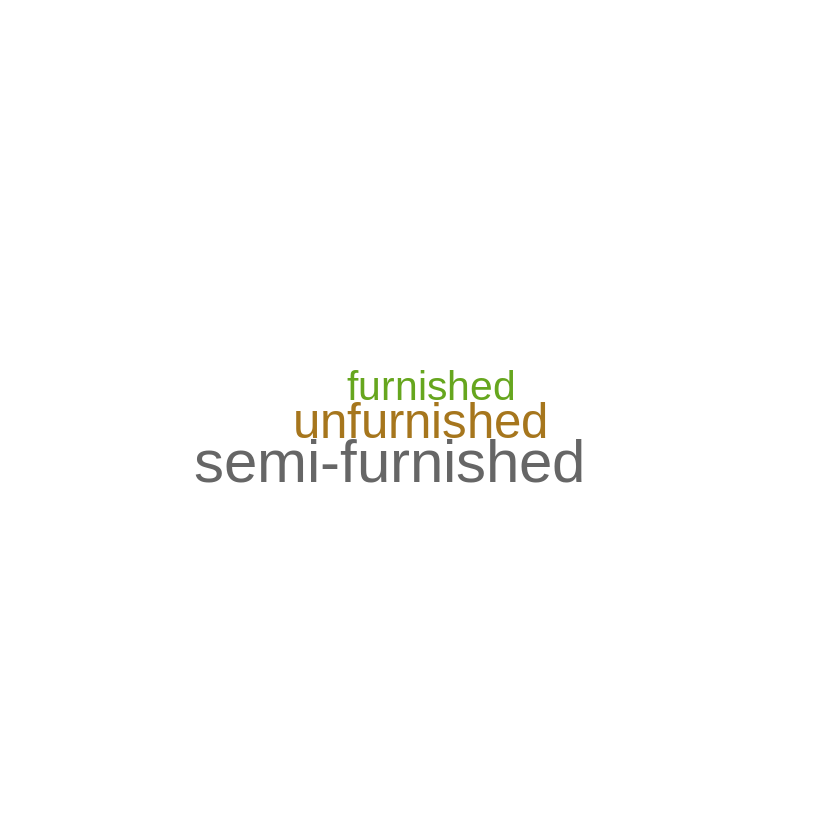

In [ ]:
furnishing_freq <- table(df$furnishingstatus)
wordcloud(names(furnishing_freq), furnishing_freq, scale=c(3,0.5), colors=brewer.pal(8, "Dark2"))

In [ ]:
# A word cloud visualizes how frequently different furnishing statuses (like furnished, semi-furnished, or unfurnished) appear in the dataset.

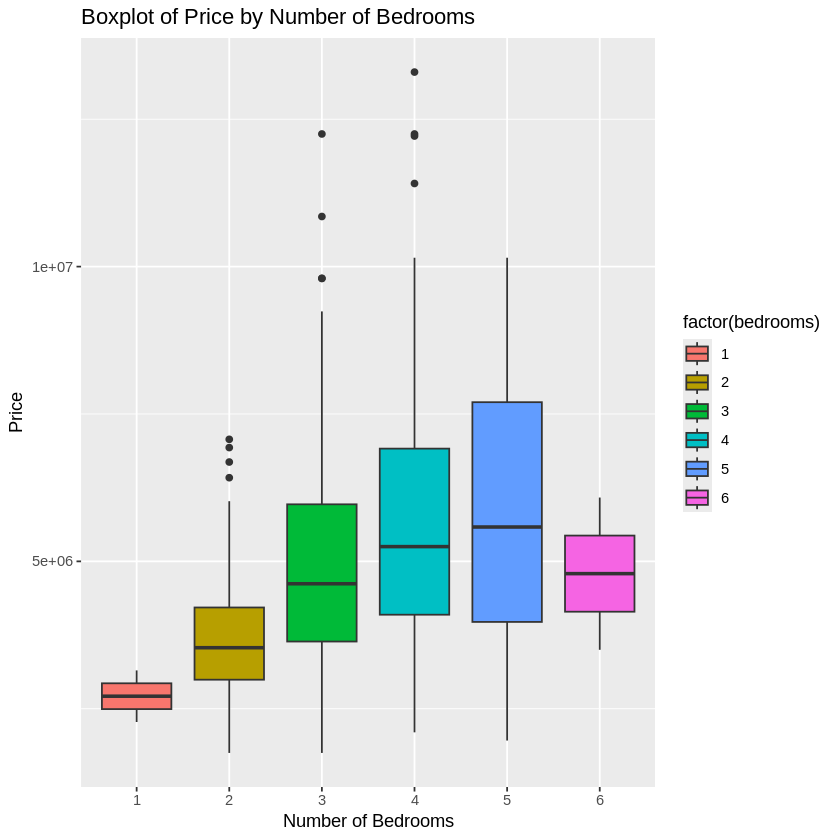

In [ ]:
ggplot(df, aes(x=factor(bedrooms), y=price)) +
  geom_boxplot(aes(fill=factor(bedrooms))) +
  labs(title="Boxplot of Price by Number of Bedrooms", x="Number of Bedrooms", y="Price")

In [ ]:
# The boxplot shows the price distribution for different numbers of bedrooms, indicating the median price and the range (IQR). Outliers (potentially overpriced or underpriced houses) can also be identified.

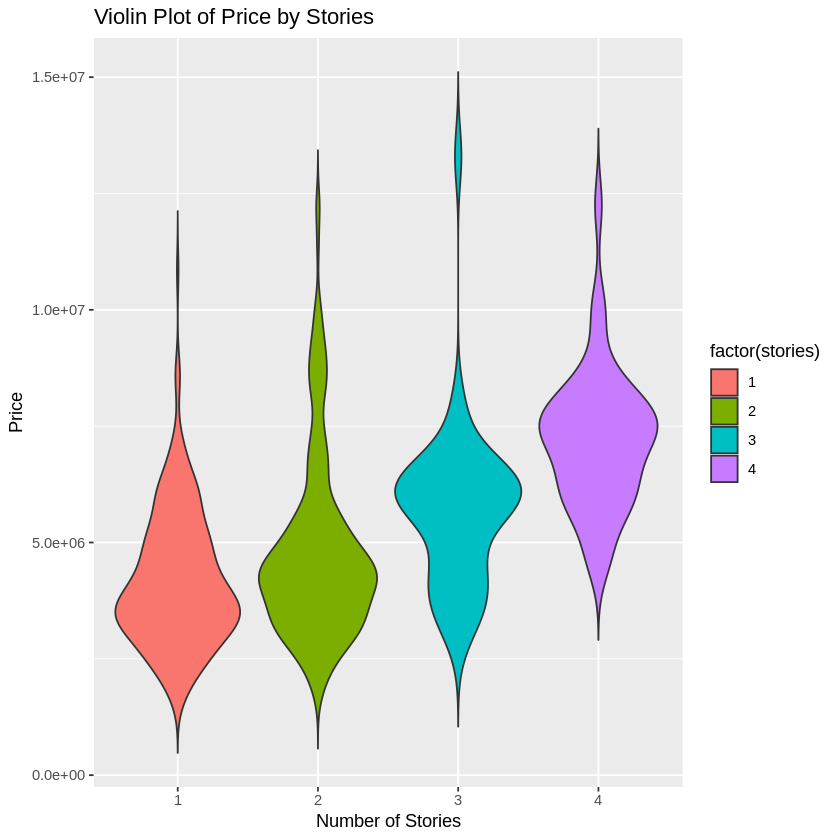

In [ ]:
ggplot(df, aes(x=factor(stories), y=price, fill=factor(stories))) +
  geom_violin(trim=FALSE) +
  labs(title="Violin Plot of Price by Stories", x="Number of Stories", y="Price")

In [ ]:
# The violin plot visualizes the distribution of house prices for various stories. This reveals more detailed information about how dense the pricing is in each category.

`geom_smooth()` using formula = 'y ~ x'


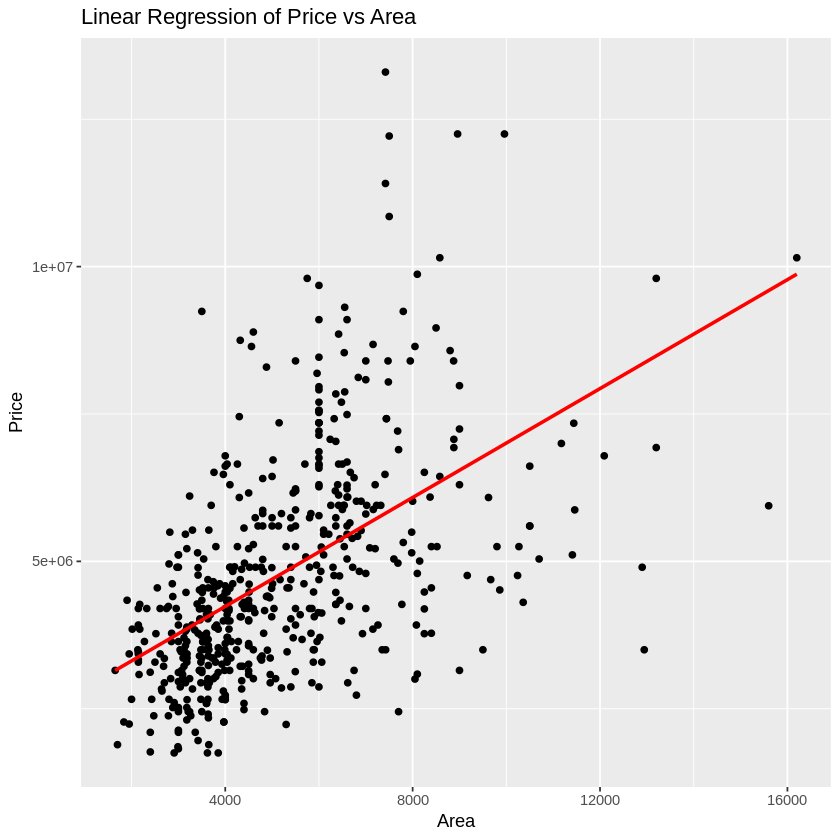

In [ ]:
ggplot(df, aes(x=area, y=price)) +
  geom_point() +
  geom_smooth(method="lm", se=FALSE, color="red") +
  labs(title="Linear Regression of Price vs Area", x="Area", y="Price")

`geom_smooth()` using formula = 'y ~ x'


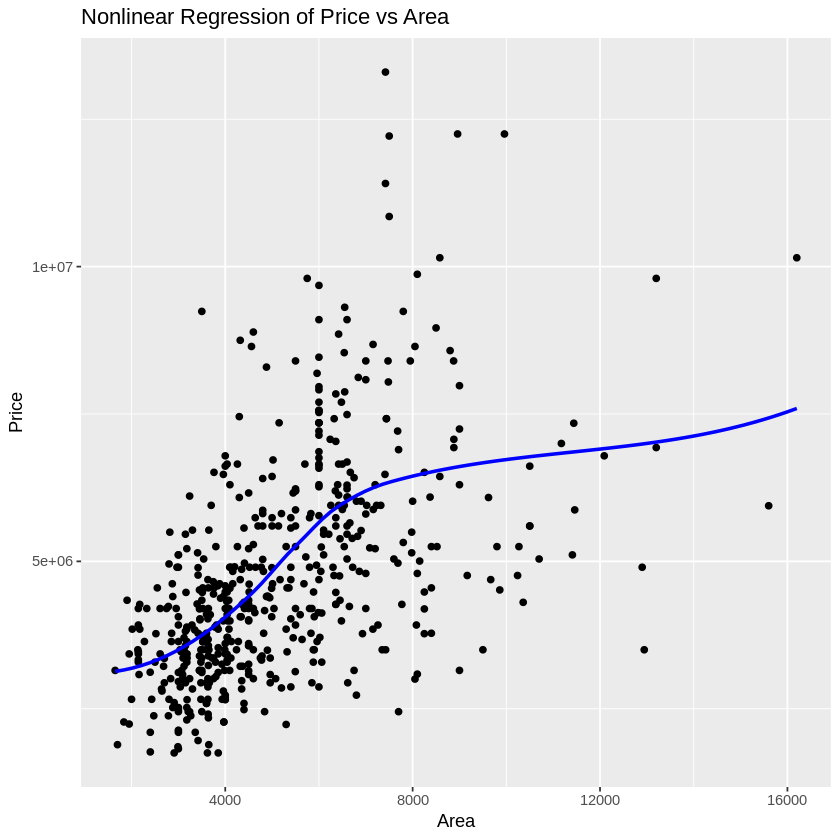

In [ ]:
ggplot(df, aes(x=area, y=price)) +
  geom_point() +
  geom_smooth(method="loess", se=FALSE, color="blue") +
  labs(title="Nonlinear Regression of Price vs Area", x="Area", y="Price")

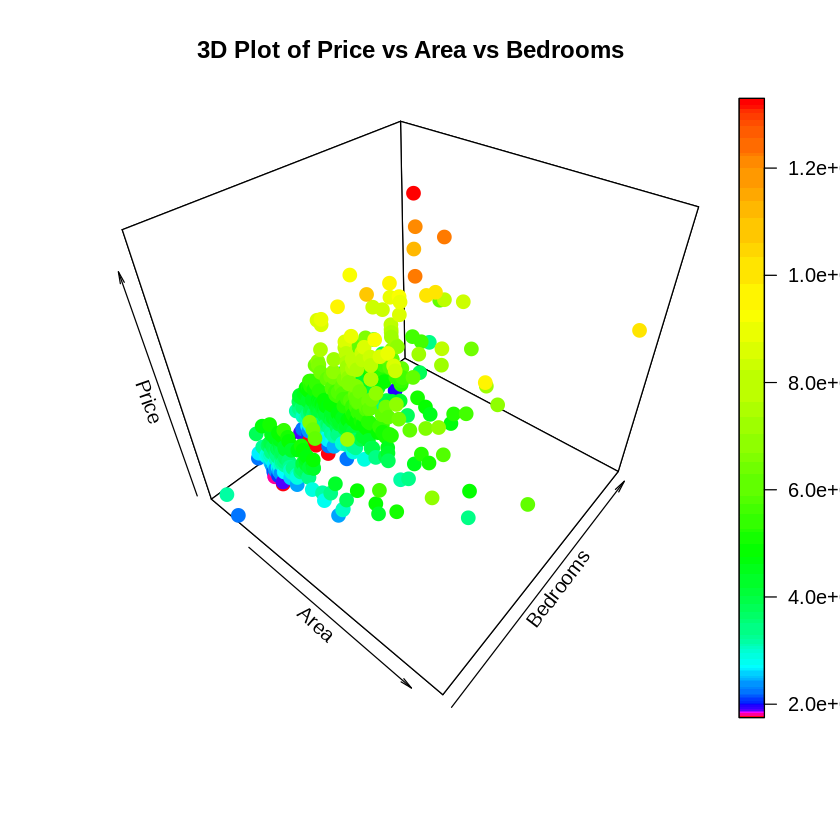

In [ ]:
scatter3D(x = df$area, y = df$bedrooms, z = df$price,
          xlab = "Area", ylab = "Bedrooms", zlab = "Price",
          col = rainbow(100)[as.numeric(cut(df$price, breaks = 100))],
          pch = 19, cex = 1.5,
          main = "3D Plot of Price vs Area vs Bedrooms")

In [ ]:
# The 3D plot allows us to examine how price varies with both area and the number of bedrooms simultaneously, revealing clusters or patterns in the data.

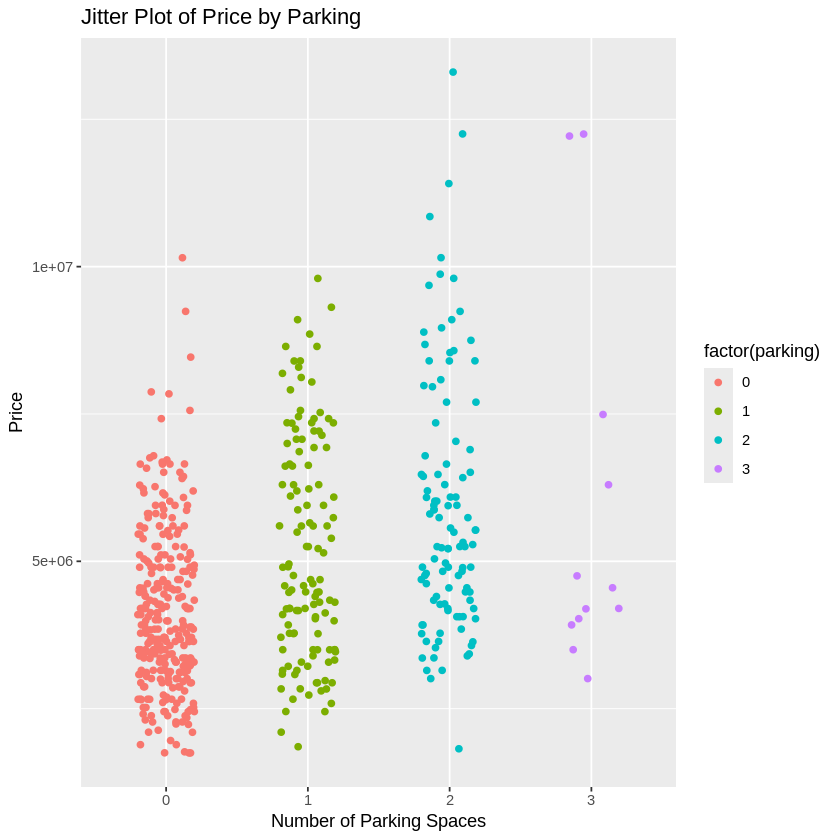

In [ ]:
# Jitter plot
ggplot(df, aes(x=factor(parking), y=price, color=factor(parking))) +
  geom_jitter(width=0.2) +
  labs(title="Jitter Plot of Price by Parking", x="Number of Parking Spaces", y="Price")

In [ ]:
# The jitter plot reveals the distribution of prices for different numbers of parking spaces and helps identify overlapping points.